# Neural Network
## Target Variable: lqt2_patho

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

c:\python38\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data = pd.read_csv('csv_data/all_lqt2_data_trunc(herg_combined_data).csv')

In [3]:
list(data)

['Unnamed: 0',
 'var',
 'isoform',
 'mut_type',
 'resnum',
 'lqt2',
 'unaff',
 'total_carriers',
 'gnomAD',
 'gnomAD_seq',
 'weight',
 'penetrance_lqt2',
 'lqt2_penetranceBayesian_initial',
 'lqt2_penetranceBayesian',
 'pph2_prob',
 'blast_pssm',
 'provean_score',
 'pamscore',
 'aasimilaritymat',
 'revel_score',
 'hm_ssPeak',
 'hm_tailPeak',
 'hm_vhalfact',
 'hm_vhalfinact',
 'hm_recovfrominact',
 'hm_taudeact_fast',
 'ht_ssPeak',
 'ht_tailPeak',
 'ht_vhalfact',
 'ht_vhalfinact',
 'ht_recovfrominact',
 'ht_taudeact_fast',
 'lqt2_dist',
 'lqt2_dist_weight',
 'Structure',
 'Function',
 'p_mean_w',
 'prior_mean_w',
 'prior_mean',
 'alpha',
 'beta',
 'lqt2_patho',
 'p_mean_prior',
 'RMSF',
 'lqt2_dist_sequence',
 'lqt2_dist_weight_sequence',
 'lqt2_dist_observed',
 'lqt2_dist_weight_observed',
 'lqt2_dist_max',
 'lqt2_dist_weight_max',
 'lqt2_dist_mean',
 'lqt2_dist_weight_mean',
 'lqt2_dist_obs_max',
 'lqt2_dist_weight_obs_max',
 'lqt2_dist_obs_mean',
 'lqt2_dist_weight_obs_mean',
 'lqt2_

In [4]:
filter_columns = ['penetrance_lqt2','RMSF','lqt2_dist_sequence','lqt2_dist_weight_sequence',
                  'lqt2_dist_observed','lqt2_dist_weight_observed', 'lqt2_dist_max', 
                  'lqt2_dist_weight_max','lqt2_dist_mean','lqt2_dist_weight_mean',
                  'lqt2_dist_obs_max','lqt2_dist_weight_obs_max','lqt2_dist_obs_mean',
                  'lqt2_dist_weight_obs_mean','lqt2_dist_obs_seq','lqt2_dist_weight_obs_seq', 
                  'revel_score','ht_tailPeak','hm_tailPeak','lqt2_dist','lqt2_dist_weight',
                  'lqt2','unaff','total_carriers','gnomAD','gnomAD_seq','weight','pph2_prob',
                  'blast_pssm','provean_score','pamscore','aasimilaritymat','hm_ssPeak',
                  'hm_vhalfact','hm_vhalfinact','hm_recovfrominact','hm_taudeact_fast',
                  'ht_ssPeak','ht_vhalfact','ht_vhalfinact','ht_recovfrominact',
                  'ht_taudeact_fast','prior_mean_w', 'prior_mean','alpha','beta','lqt2_patho',
                  'p_mean_prior']

df = data.filter(filter_columns, axis=1)

In [5]:
features = ['RMSF', 'lqt2_dist_max', 'revel_score', 'lqt2_dist_sequence', 'lqt2_dist_mean', 'lqt2_dist_observed']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['lqt2_patho'])

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(len(features),)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 2s 31ms/step - loss: nan - accuracy: 0.6333 - val_loss: nan - val_accuracy: 0.5722
Epoch 2/50
23/23 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 3/50
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 4/50
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 6/50
23/23 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 7/50
23/23 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 8/50
23/23 [==============================] - 0s 14m

29/29 [==============================] - 0s 3ms/step
Accuracy: 0.6166666666666667
Precision: 0.0
Recall: 0.0
F1 score: 0.0
Confusion Matrix:
 [[555   0]
 [345   0]]
ROC AUC Score: 0.5


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


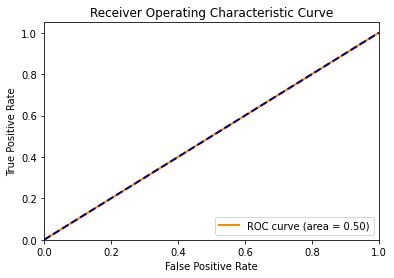

In [7]:
# predict the target values
y_pred = model.predict(X)

y_pred = np.round(y_pred)
y_pred[np.isnan(y_pred)] = 0

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:\n", confusion)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
features = ['RMSF', 'lqt2_dist_max', 'revel_score', 'lqt2_dist_sequence', 'lqt2_dist_mean', 'lqt2_dist_observed']

X = pd.DataFrame(df[features])
y = pd.DataFrame(df['lqt2_patho'])

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(len(features),)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 2s 27ms/step - loss: nan - accuracy: 0.6292 - val_loss: nan - val_accuracy: 0.5722
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 5/50
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 6/50
23/23 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.6278 - val_loss: nan - val_accuracy: 0.5722
Epoch 8/50
23/23 [==============================] - 0s 6ms/s

29/29 [==============================] - 0s 2ms/step
Accuracy: 0.6166666666666667
Precision: 0.0
Recall: 0.0
F1 score: 0.0
Confusion Matrix:
 [[555   0]
 [345   0]]
ROC AUC Score: 0.5


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


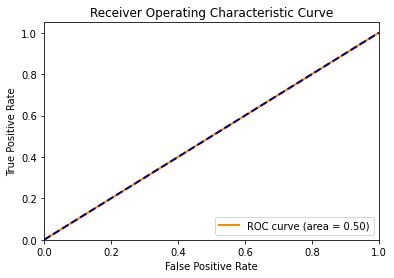

In [10]:
# predict the target values
y_pred = model.predict(X)

y_pred = np.round(y_pred)
y_pred[np.isnan(y_pred)] = 0

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Confusion Matrix:\n", confusion)
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
